In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
from imblearn.over_sampling import SMOTE 

In [83]:
# Load the dataset
df = pd.read_csv('CSV/HR_Analytics.csv') 

In [84]:
# Data Exploration and Visualization
print(df.head())
print(df.info())
print(df.describe())

   EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1     

In [85]:
# Check for missing values
print(df.isnull().sum()) 

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

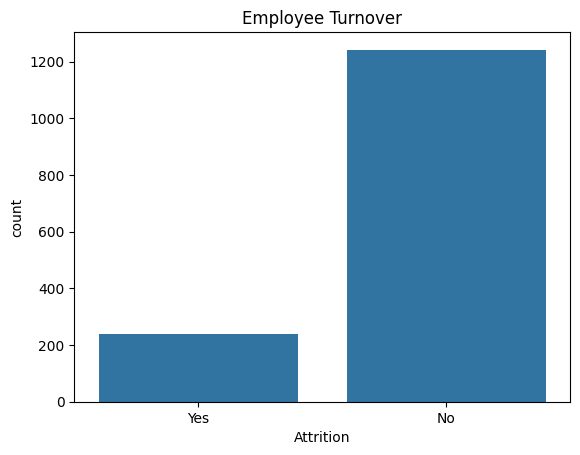

In [86]:
# Visualize the distribution of target variable
sns.countplot(x='Attrition', data=df)
plt.title('Employee Turnover')
plt.show()

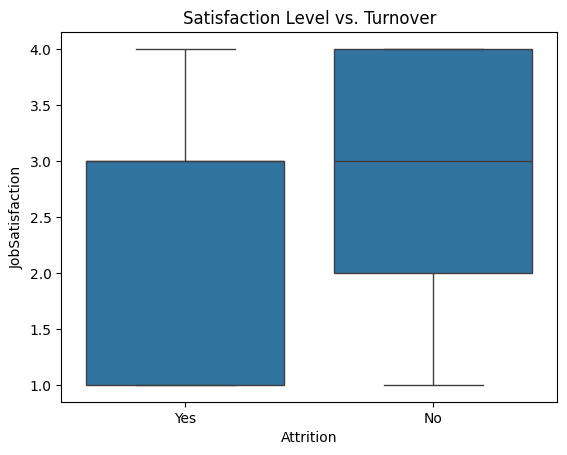

In [87]:
# Explore relationships between features and turnover
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Satisfaction Level vs. Turnover')
plt.show()
# print(df.head())


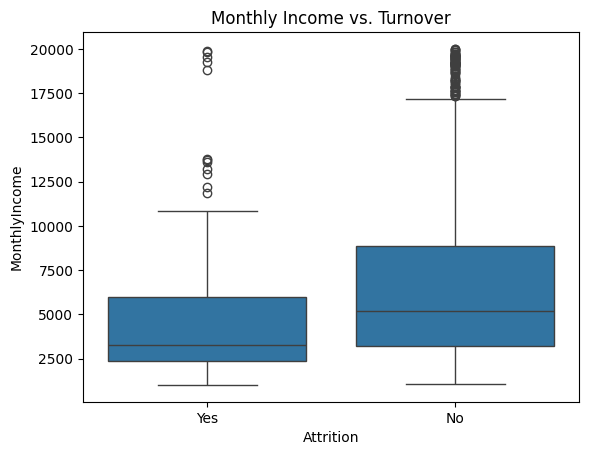

In [88]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs. Turnover')
plt.show()

In [89]:
# Data Preprocessing
# Handle missing values
# df.fillna(df.mean(), inplace=True) 

# Feature Engineering
df['Income_JobSatisfaction'] = df['MonthlyIncome'] * df['JobSatisfaction']

In [90]:
# Select features and target variable
X = df[['JobSatisfaction', 'MonthlyIncome', 'Income_JobSatisfaction', 
        'YearsAtCompany', 'TotalWorkingYears', 'WorkLifeBalance']]
y = df['Attrition']

In [91]:
# Encode categorical variables
# Example: 
df = pd.get_dummies(df, columns=['Department', 'EducationField', 'Gender', 'MaritalStatus']) 


In [92]:
#  Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [95]:
# Model Training
# model = LogisticRegression()
model = RandomForestClassifier(random_state=42, class_weight='balanced') 
# model.fit(X_train_scaled, y_train)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [96]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)

print(y_pred)

['No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes'
 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 

In [97]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(y.value_counts())

Accuracy: 0.7871621621621622
              precision    recall  f1-score   support

          No       0.87      0.88      0.87       249
         Yes       0.33      0.32      0.32        47

    accuracy                           0.79       296
   macro avg       0.60      0.60      0.60       296
weighted avg       0.79      0.79      0.79       296

[[218  31]
 [ 32  15]]
Attrition
No     1242
Yes     238
Name: count, dtype: int64


In [98]:
# Save the model and vector
with open('models/employee_turnover/model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('models/employee_turnover/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)    